School: Hanoi University of Science and Technology
Project: Student Result Analysis

Course: Introduce to Data Mining and Machine Learning

Instructor: Dr. Nguyen Nhat Quang

dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

Algorithms: KMeans, Fuzzy C-Means

Inspiration: To understand the influence of the parents background, test preparation etc on students performance

Main Steps:

1. Data preprocessing
2. Outlier Detection
3. Basic Analysis
4. Apply KMeans and visualize results
5. Apply Fuzzy C-means and visualize results
6. Performance Evaluation
7. Conclusion, represent knowledge
8. Make automatic model


In [1]:
# Import libraries
import seaborn as sns  # Visualize data
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Preprocessing
from sklearn.cluster import KMeans
import plotly.express as px
import random
import operator
import math
import pickle  # Create model


In [2]:
# Import dataset
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
# Display head of data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Describe data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
#Column data types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
#Check if data has missing value
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#Check if data has duplicated value
df.duplicated().sum()

0

Some column has long name, we shoule rename them


In [8]:
# Rename columns
df.rename(columns={"race/ethnicity": "race", "parental level of education": "parent_education", "math score": "math", "reading score": "reading", "writing score": "writing", "test preparation course": "test_preparation"}, inplace=True)
df.head()

,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Next steps, we will check whether data has ouliers

We use Standard deviation to detect outliers

In [9]:
#Define a outlier check function
def outlier_standard_deviation(df, column):
    data_mean, data_std = df[column].mean(), df[column].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
    plt.figure(figsize = (10,5))
    sns.histplot(df['math'], kde=False)
    plt.axvspan(xmin = lower,xmax= df['math'].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df['math'].max(),alpha=0.2, color='red')
    return lower, upper

The lower bound value is 20.59975971197165
The upper bound value is 111.57824028802835
Total number of outliers are 4


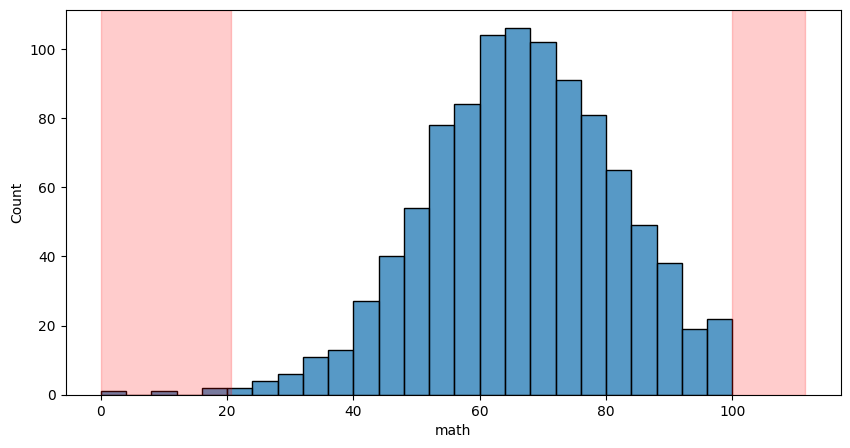

In [10]:
#Check ouliers in math columns, filter them
lower, upper = outlier_standard_deviation(df, 'math')
df = df[(df['math'] < upper) & (df['math'] > lower)]

The lower bound value is 26.189102205790704
The upper bound value is 112.48158052513298
Total number of outliers are 3


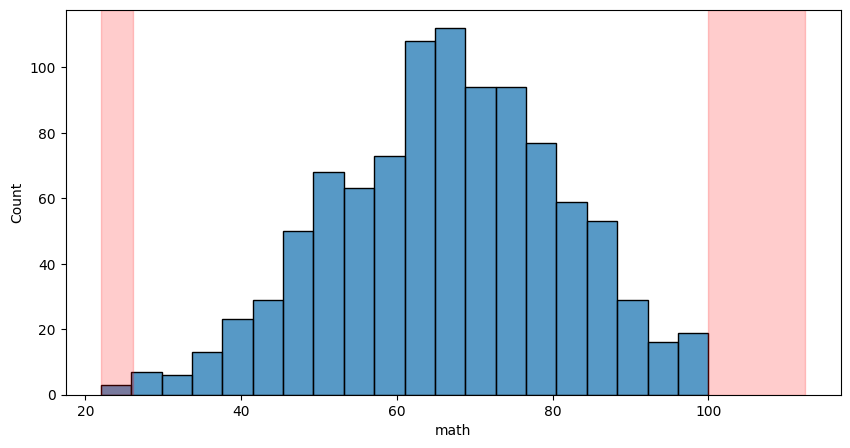

In [11]:
#Check ouliers in reading columns, filter them
lower, upper = outlier_standard_deviation(df, 'reading')
df = df[(df['reading'] < upper) & (df['reading'] > lower)]

The lower bound value is 24.225961923417813
The upper bound value is 112.54140967779064
Total number of outliers are 0


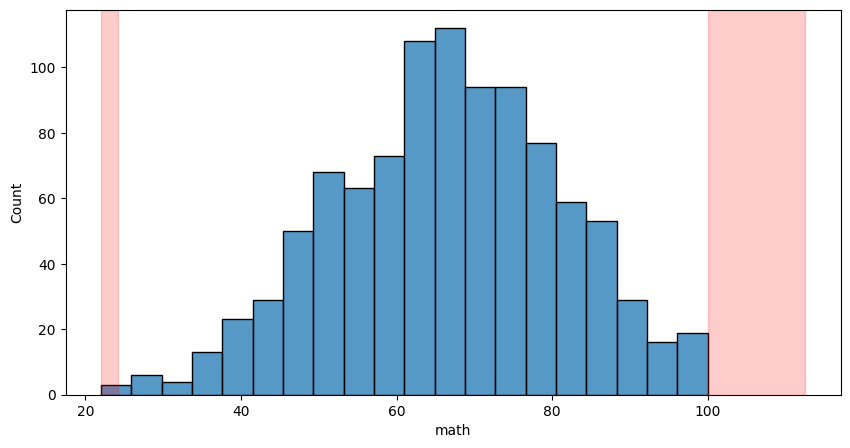

In [12]:
#Check ouliers in writing columns, filter them
lower, upper = outlier_standard_deviation(df, 'writing')
df = df[(df['writing'] < upper) & (df['writing'] > lower)]

In [13]:
df.describe()

,math,reading,writing
count,993.000000,993.000000,993.000000
mean,66.420947,69.471299,68.383686
std,14.661917,14.188799,14.719241
min,22.000000,28.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Ok, we should separate data use in each steps to more clearly

In [15]:
#Data use for basic researching
research_df = df.copy()

#Data use for clustering
kmeans_df = df.copy()
fcm_df = df.copy()

Step: Basis Analysis

In [16]:
#Calculate final score
research_df['final score'] = research_df[['math', 'reading', 'writing']].mean(axis=1)
research_df.head()

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,final score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


C:\Users\dinhh\AppData\Local\Temp\ipykernel_7492\1207430453.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, i+1)


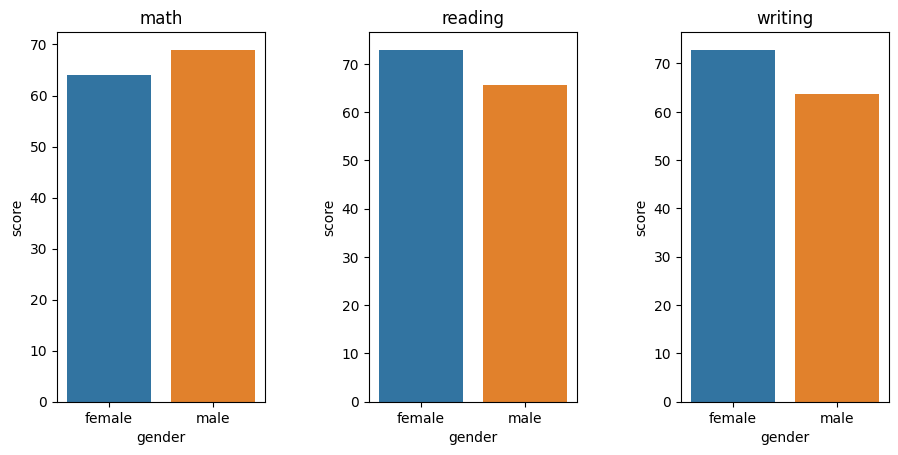

In [17]:
#Showing scores base on gender
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.5, wspace=0.5, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3, i+1)
    gender_df = research_df.groupby('gender')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=gender_df.index, y=gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(research_df.columns[-4:-1])[i])

C:\Users\dinhh\AppData\Local\Temp\ipykernel_7492\3886928119.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


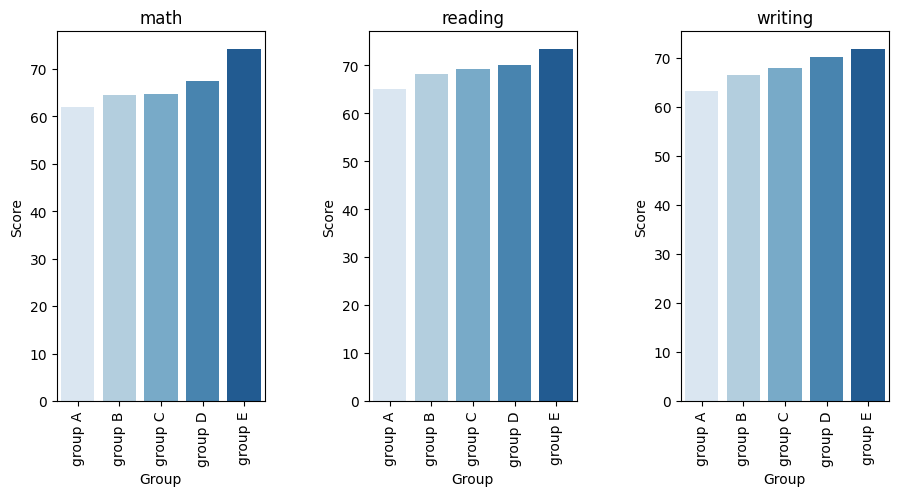

In [18]:
#Showing scores base on race
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.5, wspace=0.5, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    race_df = research_df.groupby("race")[list(research_df.columns[-4:-1])[idx]].mean()
    sns.barplot(x=race_df.index, y = race_df.values, palette = "Blues")
    plt.xlabel("Group")
    plt.ylabel("Score")
    plt.xticks(rotation=90)
    plt.title(list(research_df.columns[-4:-1])[idx])
plt.show()

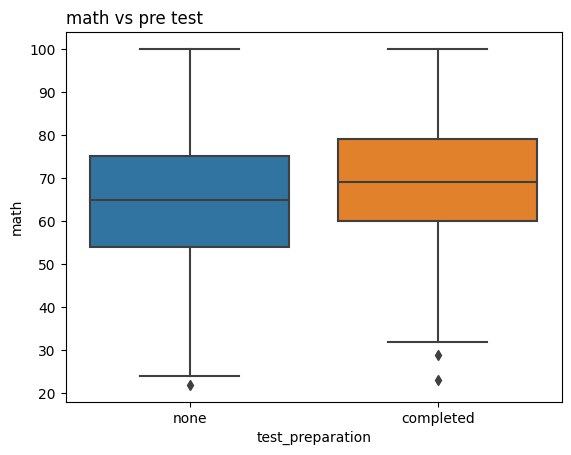

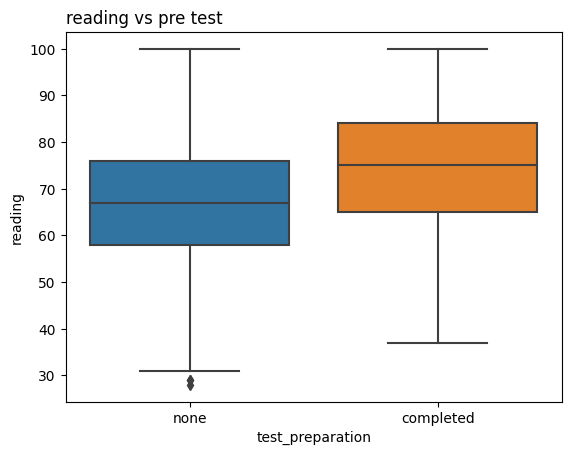

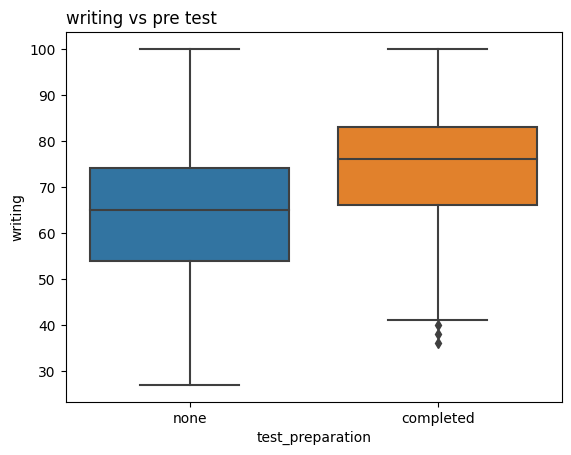

In [19]:
#Showing scores base on preparation before exams
for item in research_df.columns[-4:-1]:
    sns.boxplot(x=research_df["test_preparation"], y=research_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

C:\Users\dinhh\AppData\Local\Temp\ipykernel_7492\548904083.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, i+1)


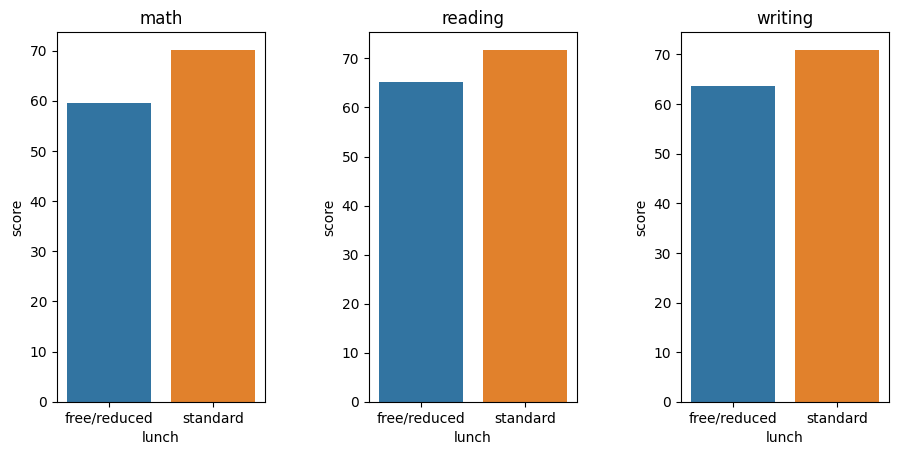

In [20]:
#Showing scores base on using lunch
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.5, wspace=0.5, left = 0.2, right = 1.5)

for i in range(3):
    plt.subplot(1,3, i+1)
    lunch_df = research_df.groupby('lunch')[list(research_df.columns[-4:-1])[i]].describe()
    sns.barplot(x=lunch_df.index, y=lunch_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(research_df.columns[-4:-1])[i])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

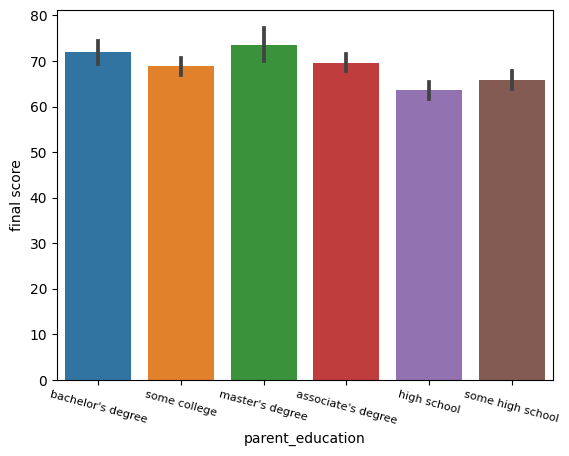

In [21]:
#Showing scores base on levels on education of parents
plt.figure(2)
sns.barplot(data=research_df, x='parent_education', y='final score')
plt.xticks(rotation=-15, fontsize=8)

After basis analysis, we should get some identities.
Next step, Clustering, but before that, we should encode some nominal columns. 

In [22]:
#Encode nominal columns
columns_encode = ['gender','race','parent_education','lunch','test_preparation']
for column in columns_encode: 
    encoder = LabelEncoder() 
    kmeans_df[column] = encoder.fit_transform(kmeans_df[column])
    print(encoder.classes_)
    print(np.sort(kmeans_df[column].unique()))

['female' 'male']
[0 1]
['group A' 'group B' 'group C' 'group D' 'group E']
[0 1 2 3 4]
["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
[0 1 2 3 4 5]
['free/reduced' 'standard']
[0 1]
['completed' 'none']
[0 1]


In [23]:
#We should also take data after encoded for FCM
fcm_df = kmeans_df.copy()

<AxesSubplot: >

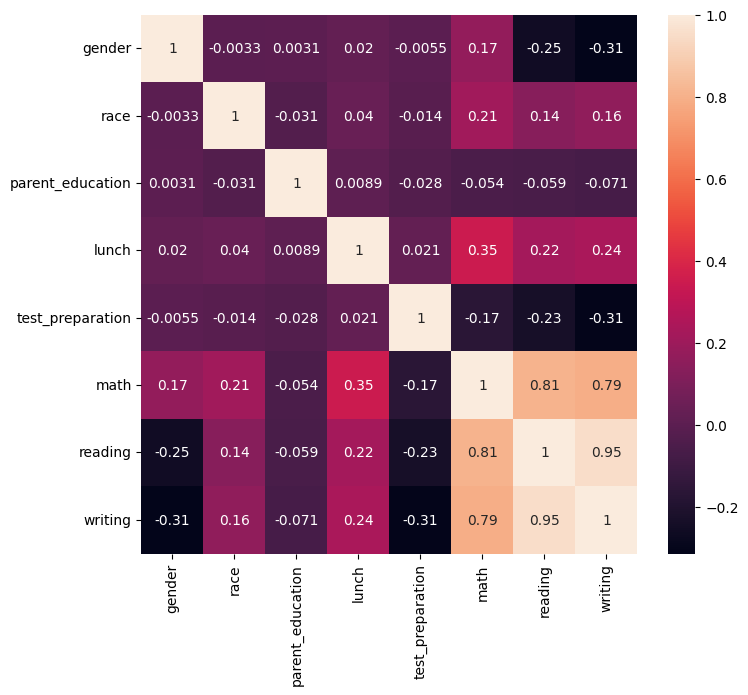

In [24]:
#Correlations among columns
correlations = kmeans_df.corr()
fig = plt.figure(figsize=(8,7))
sns.heatmap(data=correlations, annot=True)

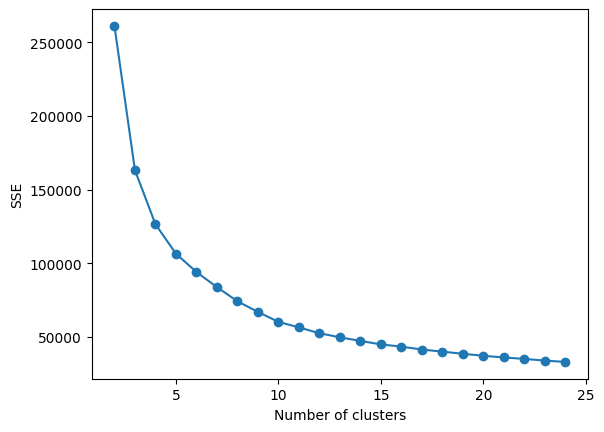

In [25]:
#Optimize k parameter in kmeans 
kmeans_dis = list()
for i in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = i)
    kmeans.fit_transform(kmeans_df.iloc[:,2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
kmeans_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [27]:
#Apply Kmeans with k=3
X = kmeans_df[["parent_education","lunch","test_preparation","math","reading","writing"]] 
kmeans = KMeans(init = "k-means++", n_clusters = 3, n_init=3)
kmeans.fit_predict(X)
kmeans_label = kmeans.labels_
kmeans_df["cluster"] = kmeans_label
centroids = kmeans.cluster_centers_
kmeans_df.head(10)

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,cluster
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,2
2,0,1,3,1,1,90,95,93,2
3,1,0,0,0,1,47,57,44,0
4,1,2,4,1,1,76,78,75,2
5,0,1,0,1,1,71,83,78,2
6,0,1,4,1,0,88,95,92,2
7,1,1,4,0,1,40,43,39,0
8,1,3,2,0,0,64,64,67,1
9,0,1,2,0,1,38,60,50,0


In [28]:
#See average scores in each cluster
class_df = kmeans_df.groupby("cluster")[kmeans_df.columns[-4:-1]].mean()
class_df

,math,reading,writing
cluster,,,
0,49.951852,52.185185,50.222222
1,66.080275,69.561927,68.839450
2,82.432056,85.595819,84.777003


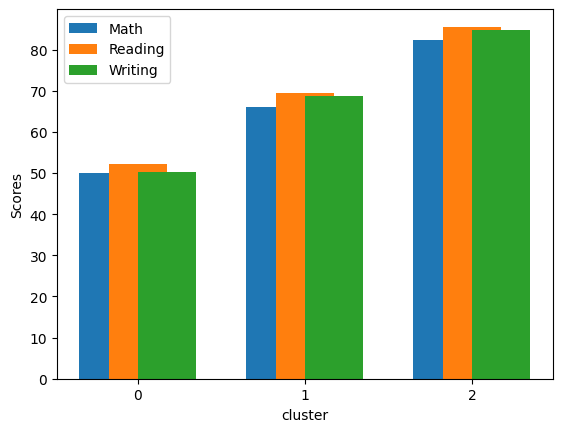

In [29]:
#Visualize scores base on each cluster
ind = np.arange(3)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('cluster')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [30]:
#Visualize clusters

#Naming clusters equal to color name
cluster_name = ({0 : 'AliceBlue', 
                        1 : 'AntiqueWhite',
                        2 : 'Aquamarine'})
kmeans_df['cluster name'] = kmeans_df['cluster'].map(cluster_name)

#Plotting
fig = px.scatter_3d(kmeans_df, x = 'math', 
                    y = 'reading', 
                    z = 'writing',
                    color = 'cluster name')
fig.show()

Leave it there, let's start FCM

In [31]:
#Define parameters and funtions

#number of clusters
k = 3
#maximum number of iterations
MAX_ITER = 100
#number of data points
n = len(fcm_df)
#Fuzzy parameter
m = 1.7

def initializeMembershipMatrix():
  membership_mat = []
  for i in range(n):
    random_num_list = [random.random() for i in range(k)]
    summation = sum(random_num_list)
    temp_list = [x/summation for x in random_num_list]
    flag = temp_list.index(max(temp_list))
    for j in range(0, len(temp_list)):
      if (j == flag):
        temp_list[j] = 1
      else:
        temp_list[j] = 0

    membership_mat.append(temp_list)
  return membership_mat

def calculateClusterCenter(membership_mat):
  cluster_mem_val = list(zip(*membership_mat))
  cluster_centers = []
  for j in range(k):
    x = list(cluster_mem_val[j])
    xraised = [p ** m for p in x]
    denominator = sum(xraised)
    temp_num = []
    for i in range(n):
      data_point = list(fcm_df.iloc[i, 2:])
      prod = [xraised[i] * val for val in data_point]
      temp_num.append(prod)
    numerator = map(sum, list(zip(*temp_num)))
    center = [z/denominator for z in numerator]
    cluster_centers.append(center)
  return cluster_centers

def updateMembershipValue(membership_mat, cluster_centers):
  p = float(2/(m-1))
  for i in range(n):
    x = list(fcm_df.iloc[i, 2:])
    distances = [np.linalg.norm(np.array(list(map(operator.sub, x, cluster_centers[j])))) for j in range(k)]
    for j in range(k):
      den = sum([math.pow(float(distances[j]/distances[c]), p) for c in range(k)])
      membership_mat[i][j] = float(1/den)
  return membership_mat

def getClusters(membership_mat):
  cluster_labels = list()
  for i in range(n):
    max_val, idx = max((val,idx) for (idx, val) in enumerate(membership_mat[i]))
    cluster_labels.append(idx)
  return cluster_labels

def fuzzyCMeansClustering(): 
    membership_mat = initializeMembershipMatrix()
    curr = 0
    while curr < MAX_ITER:
        cluster_centers = calculateClusterCenter(membership_mat)
        membership_mat = updateMembershipValue(membership_mat, cluster_centers)
        cluster_labels = getClusters(membership_mat)
        curr += 1
    return cluster_labels, cluster_centers, membership_mat

In [32]:
#Implement FCM
labels, centers, membership_mat = fuzzyCMeansClustering()

In [33]:
#Membership matrix 
membership_mat

[[0.011276071922827861, 0.9258193502940043, 0.06290457778316783],
 [0.017497819653766337, 0.13193425462141242, 0.8505679257248212],
 [0.008697076641706249, 0.04095193020683609, 0.9503509931514578],
 [0.9762489410430816, 0.020077728110321498, 0.003673330846596805],
 [0.01989703337912081, 0.5086527814636709, 0.4714501851572084],
 [0.020470731339968663, 0.3683243938683443, 0.611204874791687],
 [0.006920243573019231, 0.03415533771357083, 0.9589244187134098],
 [0.9327154759813696, 0.053109297709320546, 0.014175226309309888],
 [0.020849862881917803, 0.9705994328212325, 0.008550704296849766],
 [0.9179546774921364, 0.06856014107793956, 0.013485181429923837],
 [0.9430424122527785, 0.0510064794184085, 0.005951108328813069],
 [0.9604143841398278, 0.03227929448860771, 0.007306321371564501],
 [0.027466041710328914, 0.8240362235894975, 0.14849773470017352],
 [0.027420416803211976, 0.8081918797218907, 0.16438770347489737],
 [0.9630145433872116, 0.032967547828504015, 0.00401790878428445],
 [0.01973345

In [34]:
#Get labels to fcm_df
fcm_df['cluster'] = labels
fcm_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,cluster
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,2
2,0,1,3,1,1,90,95,93,2
3,1,0,0,0,1,47,57,44,0
4,1,2,4,1,1,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95,2
996,1,2,2,0,1,62,55,55,0
997,0,2,2,0,0,59,71,65,1
998,0,3,4,1,0,68,78,77,1


In [35]:
#Visualize clusters

#Naming clusters equal to color name
cluster_name = ({0 : 'AliceBlue', 
                        1 : 'AntiqueWhite',
                        2 : 'Aquamarine'})
fcm_df['cluster name'] = fcm_df['cluster'].map(cluster_name)

#Plotting
fig = px.scatter_3d(fcm_df, x = 'math', 
                    y = 'reading', 
                    z = 'writing',
                    color = 'cluster name')
fig.show()

We had implemented 2 algorithms already. So next step, let's evaluate performance!

Ok, We will use Dunn index and Davies-Bouldin index to evaluate!

In [36]:
#Define functions

def getInnerDistance(cluslabels,centre,data):
    innerDis = np.full(len(centre),0.0)
    for i in range(len(data)):
        cen = cluslabels[i]
        innerDis[cen] += np.linalg.norm(data[i]-centre[cen])

    for i in range(len(centre)):
        innerDis[i] = innerDis[i]/(cluslabels.count(i))
    return innerDis

def getDunnIndex(cluslabels,centre,data):
    inter = np.inf
    for i in range(len(centre)):
        for j in range(i+1,len(centre)):
            temp = np.linalg.norm(centre[i]-centre[j])
            if inter > temp:
                inter = temp

    intra = 0
    for i in range(len(data)):
        for j in range(i+1,len(data)):
            if cluslabels[i] == cluslabels[j]:
                temp = np.linalg.norm(data[i]-data[j])
                if intra < temp:
                    intra = temp
    dunnIdx = inter/intra
    return dunnIdx

def getDB(cluslabels,centre,data):
    innerDis = getInnerDistance(cluslabels,centre,data)
    max = 0
    for i in range(len(centre)):
        for j in range(i+1,len(centre)):
        
            score = (innerDis[i]+innerDis[j])/np.linalg.norm(centre[i]-centre[j])
            if max < score:
                max = score
    return max

In [37]:
#Check Kmeans
print("DB index =", getDB(list(kmeans_df['cluster']), list(centroids), list(kmeans_df.iloc[:,2:-2].values)))
print("Dunn index =", getDunnIndex(list(kmeans_df['cluster']), list(centroids), list(kmeans_df.iloc[:,2:-2].values)))

DB index = 0.8229072038328629
Dunn index = 0.5038196727167851


In [38]:
#Check FCM
print("DB index =", getDB(list(fcm_df['cluster']), np.array(centers), list(fcm_df.iloc[:,2:-2].values)))
print("Dunn index =", getDunnIndex(list(fcm_df['cluster']), np.array(centers), list(fcm_df.iloc[:,2:-2].values)))

DB index = 0.8133023997329732
Dunn index = 0.5099183939594114


Next steps: Represent Knowledge

We will use KMeans results

In [39]:
#Calculate average scores in each clusters
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([2, 1, 0], dtype='int64', name='cluster')

In [40]:
rank

cluster
2    84.268293
1    68.160550
0    50.786420
Name: total_ave_score, dtype: float64

In [41]:
#Concat data
research_df['cluster'] = kmeans_df['cluster']
research_df

,gender,race,parent_education,lunch,test_preparation,math,reading,writing,final score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,2
2,female,group B,master's degree,standard,none,90,95,93,92.666667,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,2
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,2
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,0
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,1
998,female,group D,some college,standard,completed,68,78,77,74.333333,1


C:\Users\dinhh\AppData\Local\Temp\ipykernel_7492\3091449293.py:6: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



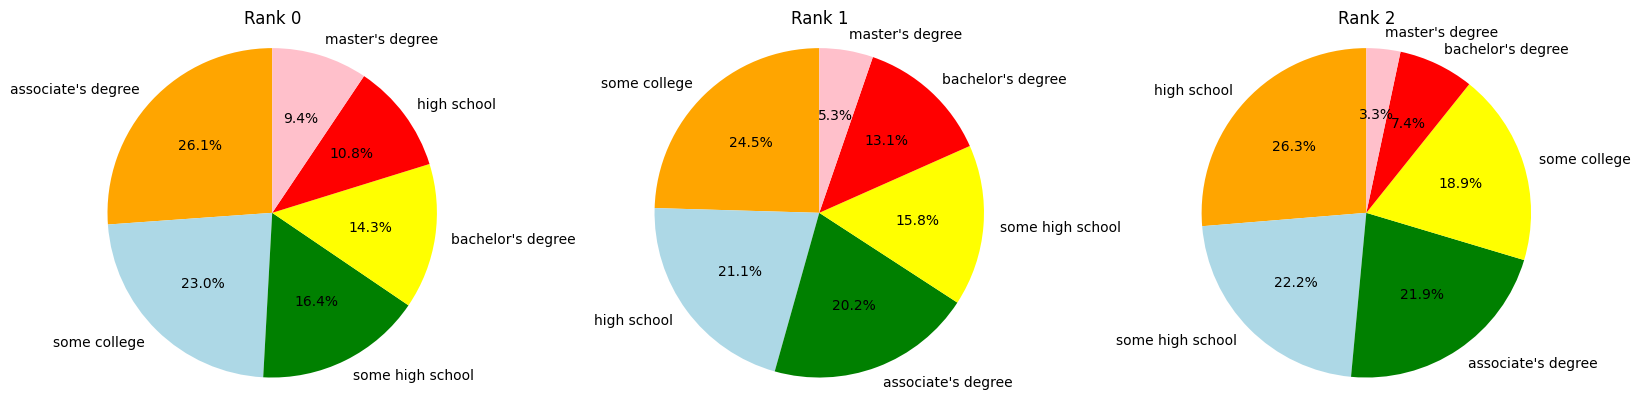

In [42]:
#Levels of education in each clusters
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(3):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = research_df[research_df["cluster"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")

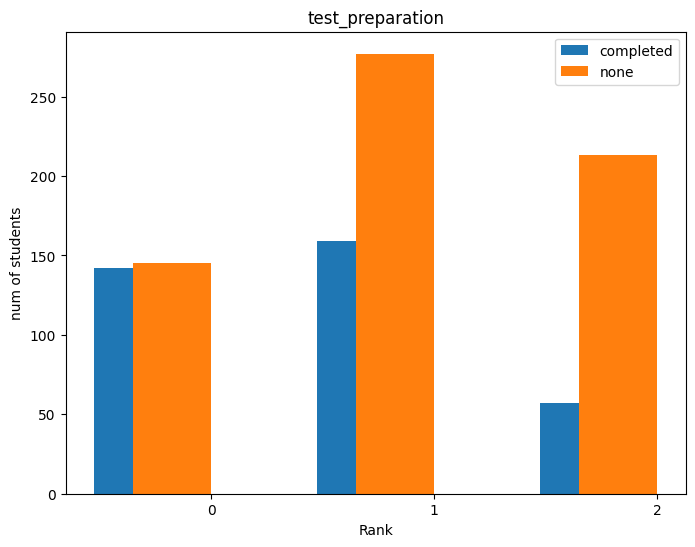

In [43]:
#Showing preparation before exams in each clusters
def plot_bar(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(3)
    for idx in range(3):
        num = "class"+ str(idx)
        num = research_df[research_df["cluster"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) 
            else:
                index_dict[key].append(percentage_of_column[key]) 
   
    percentage_of_column = research_df[research_df["cluster"]==rank.index[2]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('num of students')
    ax.set_title(column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar("test_preparation")

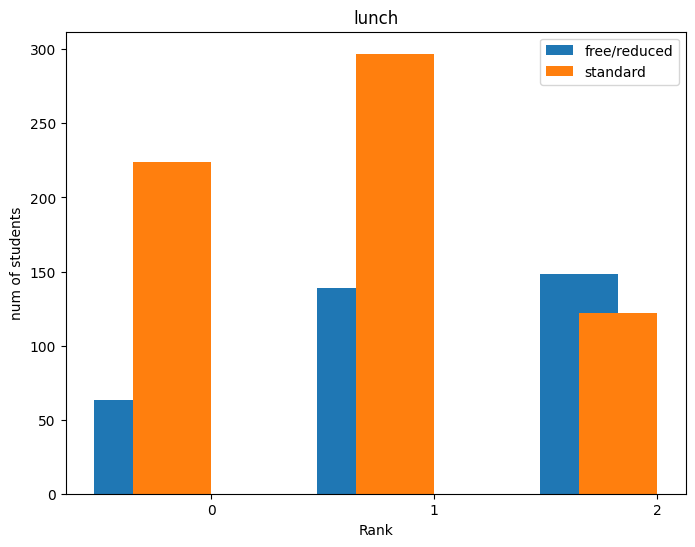

In [44]:
#How about lunch????? 
plot_bar("lunch")

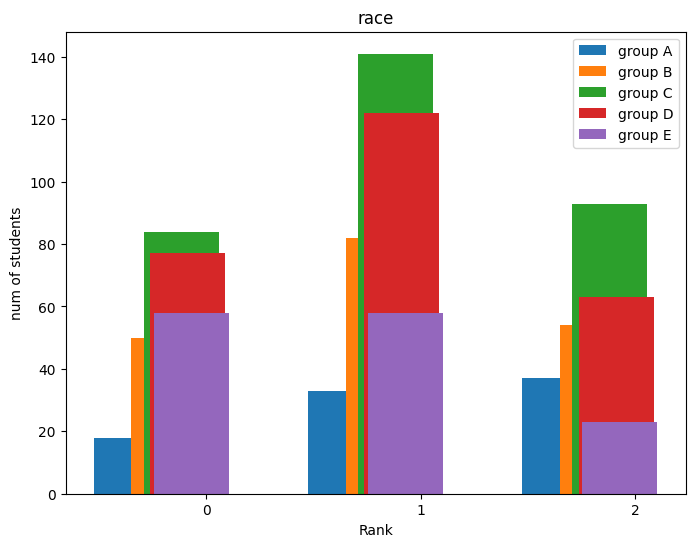

In [49]:
plot_bar("race")

Greate. We almost done! Let's make model

In [45]:
pickle.dump(kmeans, open('cluster', 'wb'))

In [46]:
new_df = pd.DataFrame({'gender' : 'female', 
           'race/ethnicity' : 'group A', 
           'parental level of education' : "associate's degree",
           'lunch' : 'standard', 
           'test preparation course' : 'completed', 
           'math score' : [90], 
           'reading score' : [90], 
           'writing score' : [90]}) 

#Preprocessing
def Preprocess(new_data):
    #We don't need gender and race
    new_data.drop('gender', axis=1, inplace=True)
    new_data.drop('race/ethnicity', axis=1, inplace=True)

    #Renaming
    new_data.rename(columns={"parental level of education": "parent_education", "math score": "math", "reading score": "reading", "writing score": "writing", "test preparation course": "test_preparation"}, inplace=True)

    # Encoding 
    parent_education = ({"associate's degree" : 0, 
                         "bachelor's degree" : 1, 
                         'high school' : 2, 
                         "master's degree" : 3, 
                         'some college' : 4, 
                         'some high school' : 5})
    lunch_map = ({'free/reduced' : 0, 
                  'standard' : 1}) 
    course_map = ({'completed' : 0, 
                   'none' : 1})
    
    columns = ['parent_education', 'lunch', 'test_preparation']
    maps = [parent_education, lunch_map, course_map]
    for col, item in zip(columns, maps):
        new_data[col] = new_data[col].map(item)
    
    return new_data 

# Preprocessing new_df
new_df = Preprocess(new_df) 

print(new_df.head())

   parent_education  lunch  test_preparation  math  reading  writing
0                 0      1                 0    90       90       90


In [47]:
kmeans_auto_model = pickle.load(open('./cluster','rb'))

In [48]:
#Test model
cluster = kmeans_auto_model.predict(new_df)

if cluster == 0: 
    print(f'Cluster {cluster}')
elif cluster == 1:
    print(f'Cluster {cluster}') 
elif cluster == 2: 
    print(f'Cluster {cluster}') 

Cluster [2]
